In [4]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore') #filter some warning messages
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [5]:
# site locations
ooi_co =np.array([[47.1336, -124.272,29], # inshore: lat, lon, depth (surface always 7m)
     [46.9859, -124.566, 88], # shelf
     [46.8508, -124.972, 540]]) # offshore
locs = ['Inshore','Shelf','Offshore']

In [6]:
# data directory
ooidir = '~/Documents/LargeData/QIN/OOI_Mooring/'
glodir = '~/Documents/Largedata/QIN/Glorys_Model/'
# figure directory
figdir = '/Users/sol/Google Drive/professional/research/projects/2020_QIN/figures/Comparison_Obs_Glorys/'

In [8]:
# read OOI data and model data
OOI_I = pd.read_csv(ooidir+'QIN_Inshore_TSDOS.csv', index_col=0)
OOI_I['Day']=15
OOI_I = OOI_I.reindex(columns = ['Year','Month','Day','T_29m', 'S_29m', 'DO_29m', 'T_7m', 'S_7m', 'DO_7m'])
OOI_I['Fecha']=pd.to_datetime(OOI_I[list(OOI_I)[:3]])

OOI_S = pd.read_csv(ooidir+'QIN_Shelf_TSDOS.csv', index_col=0)
OOI_S['Day']=15
OOI_S = OOI_S.reindex(columns = ['Year','Month','Day','T_88m', 'S_88m', 'DO_88m', 'T_7m', 'S_7m', 'DO_7m'])
OOI_S['Fecha']=pd.to_datetime(OOI_S[list(OOI_S)[:3]])

OOI_O = pd.read_csv(ooidir+'QIN_Offshore_TSDOS.csv', index_col=0)
OOI_O['Day']=15
OOI_O = OOI_O.reindex(columns = ['Year','Month','Day','T_540m', 'S_540m', 'DO_540m', 'T_7m', 'S_7m', 'DO_7m'])
OOI_O['Fecha']=pd.to_datetime(OOI_O[list(OOI_O)[:3]])


# T
dTI = xr.open_dataset(glodir+'Stationdata_var_thetao_lat_-124.272_lon_47.1336_GLORYS12V1.nc')
dTI.close()
dTI1 = dTI.sel(time=slice('2014-01-01','2020-12-31'),depth=slice(6,8)).mean('depth',skipna=True)
dTI2 = dTI.sel(time=slice('2014-01-01','2020-12-31'),depth=slice(13,38)).mean('depth',skipna=True)
dTS = xr.open_dataset(glodir+'Stationdata_var_thetao_lat_-124.566_lon_46.9859_GLORYS12V1.nc')
dTS.close()
dTS1 = dTS.sel(time=slice('2014-01-01','2020-12-31'),depth=slice(6,8)).mean('depth',skipna=True)
dTS2 = dTS.sel(time=slice('2014-01-01','2020-12-31'),depth=slice(70,98)).mean('depth',skipna=True)
dTO = xr.open_dataset(glodir+'Stationdata_var_thetao_lat_-124.972_lon_46.8508_GLORYS12V1.nc')
dTO.close()
dTO1 = dTO.sel(time=slice('2014-01-01','2020-12-31'),depth=slice(6,8)).mean('depth',skipna=True)
dTO2 = dTO.sel(time=slice('2014-01-01','2020-12-31'),depth=slice(500,560)).mean('depth',skipna=True)

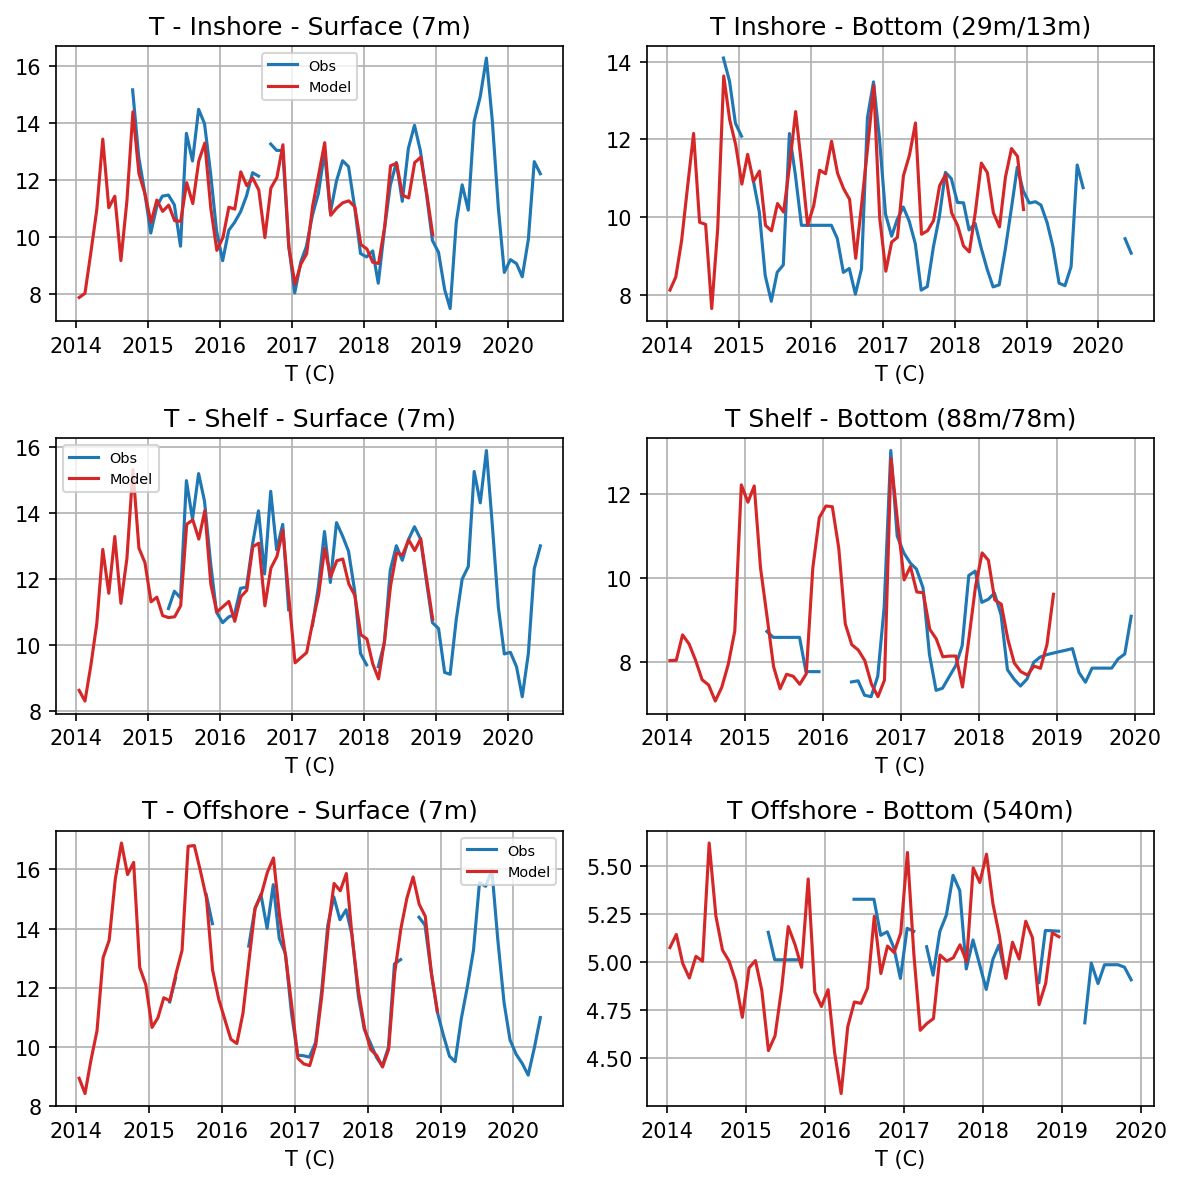

In [9]:
plt.figure(figsize=(8,8),dpi=150)

plt.subplot(3,2,1)
plt.plot(OOI_I['Fecha'],OOI_I['T_7m'],label='Obs')
plt.plot(dTI1.time,dTI1.thetao,label='Model',c='tab:red')
plt.grid(True)
plt.xlabel('T (C)')
plt.title('T - Inshore - Surface (7m)')
plt.legend(loc=0, fontsize='x-small')

plt.subplot(3,2,2)
plt.plot(OOI_I['Fecha'],OOI_I['T_29m'],label='Obs')
plt.plot(dTI2.time,dTI2.thetao,label='Model',c='tab:red')
plt.grid(True)
plt.xlabel('T (C)')
plt.title('T Inshore - Bottom (29m/13m)')

plt.subplot(3,2,3)
plt.plot(OOI_S['Fecha'],OOI_S['T_7m'],label='Obs')
plt.plot(dTS1.time,dTS1.thetao,label='Model',c='tab:red')
plt.grid(True)
plt.xlabel('T (C)')
plt.title('T - Shelf - Surface (7m)')
plt.legend(loc=0, fontsize='x-small')

plt.subplot(3,2,4)
plt.plot(OOI_S['Fecha'],OOI_S['T_88m'],label='Obs')
plt.plot(dTS2.time,dTS2.thetao,label='Model',c='tab:red')
plt.grid(True)
plt.xlabel('T (C)')
plt.title('T Shelf - Bottom (88m/78m)')

plt.subplot(3,2,5)
plt.plot(OOI_O['Fecha'],OOI_O['T_7m'],label='Obs')
plt.plot(dTO1.time,dTO1.thetao,label='Model',c='tab:red')
plt.grid(True)
plt.xlabel('T (C)')
plt.title('T - Offshore - Surface (7m)')
plt.legend(loc=0, fontsize='x-small')

plt.subplot(3,2,6)
plt.plot(OOI_O['Fecha'],OOI_O['T_540m'],label='Obs')
plt.plot(dTO2.time,dTO2.thetao,label='Model',c='tab:red')
plt.grid(True)
plt.xlabel('T (C)')
plt.title('T Offshore - Bottom (540m)')

plt.tight_layout()

plt.savefig(figdir+'T_mod_obsOOI_interannual.png')
plt.show()

In [10]:
# Differences Temperature

#### surface ####
# Inshore
tmp = OOI_I.copy()
tmp = tmp.rename(columns={'Fecha': "Datetime"})
tmp = tmp.set_index('Datetime')

# surface
x=dTI1.thetao.to_dataframe()
x['year']=x.index.year.values
x['month']=x.index.month.values
x['day']=15
x['fechas'] = pd.to_datetime(x[list(x)[-3:]])
x = x.rename(columns={'fechas': "Datetime"})
x = x.set_index('Datetime')
tmp['ModTIS']=x['thetao']

print('T - Inshore - Surface ')
print(np.nanmean(np.abs(tmp['T_7m']-tmp['ModTIS'])))
print(np.nanstd(np.abs(tmp['T_7m']-tmp['ModTIS'])))

# Shelf
tmp = OOI_S.copy()
tmp = tmp.rename(columns={'Fecha': "Datetime"})
tmp = tmp.set_index('Datetime')

# surface
x=dTS1.thetao.to_dataframe()
x['year']=x.index.year.values
x['month']=x.index.month.values
x['day']=15
x['fechas'] = pd.to_datetime(x[list(x)[-3:]])
x = x.rename(columns={'fechas': "Datetime"})
x = x.set_index('Datetime')
tmp['ModTIS']=x['thetao']

print('\nT - Shelf - Surface ')
print(np.nanmean(np.abs(tmp['T_7m']-tmp['ModTIS'])))
print(np.nanstd(np.abs(tmp['T_7m']-tmp['ModTIS'])))

# Offshore
tmp = OOI_O.copy()
tmp = tmp.rename(columns={'Fecha': "Datetime"})
tmp = tmp.set_index('Datetime')

# surface
x=dTO1.thetao.to_dataframe()
x['year']=x.index.year.values
x['month']=x.index.month.values
x['day']=15
x['fechas'] = pd.to_datetime(x[list(x)[-3:]])
x = x.rename(columns={'fechas': "Datetime"})
x = x.set_index('Datetime')
tmp['ModTIS']=x['thetao']

print('\nT - offshore - Surface ')
print(np.nanmean(np.abs(tmp['T_7m']-tmp['ModTIS'])))
print(np.nanstd(np.abs(tmp['T_7m']-tmp['ModTIS'])))

##### Bottom ####
# Inshore
tmp = OOI_I.copy()
tmp = tmp.rename(columns={'Fecha': "Datetime"})
tmp = tmp.set_index('Datetime')

# # Bottom model=13.5, observations = 29m
x=dTI2.thetao.to_dataframe()
x['year']=x.index.year.values
x['month']=x.index.month.values
x['day']=15
x['fechas'] = pd.to_datetime(x[list(x)[-3:]])
x = x.rename(columns={'fechas': "Datetime"})
x = x.set_index('Datetime')
tmp['ModTIS']=x['thetao']

print('\n\nT - Inshore - Bottom (29m/13.5m) ')
print(np.nanmean(np.abs(tmp['T_29m']-tmp['ModTIS'])))
print(np.nanstd(np.abs(tmp['T_29m']-tmp['ModTIS'])))


# Shelf
tmp = OOI_S.copy()
tmp = tmp.rename(columns={'Fecha': "Datetime"})
tmp = tmp.set_index('Datetime')

# Bottom model=78, observations = 88m
x=dTS2.thetao.to_dataframe()
x['year']=x.index.year.values
x['month']=x.index.month.values
x['day']=15
x['fechas'] = pd.to_datetime(x[list(x)[-3:]])
x = x.rename(columns={'fechas': "Datetime"})
x = x.set_index('Datetime')
tmp['ModTIS']=x['thetao']

print('\nT - Shelf - Bottom (88m/78m) ')
print(np.nanmean(np.abs(tmp['T_88m']-tmp['ModTIS'])))
print(np.nanstd(np.abs(tmp['T_88m']-tmp['ModTIS'])))

# Offshore
tmp = OOI_O.copy()
tmp = tmp.rename(columns={'Fecha': "Datetime"})
tmp = tmp.set_index('Datetime')

# bottom 540m
x=dTO2.thetao.to_dataframe()
x['year']=x.index.year.values
x['month']=x.index.month.values
x['day']=15
x['fechas'] = pd.to_datetime(x[list(x)[-3:]])
x = x.rename(columns={'fechas': "Datetime"})
x = x.set_index('Datetime')
tmp['ModTIS']=x['thetao']

print('\nT - offshore - Bottom (540m) ')
print(np.nanmean(np.abs(tmp['T_540m']-tmp['ModTIS'])))
print(np.nanstd(np.abs(tmp['T_540m']-tmp['ModTIS'])))


T - Inshore - Surface 
0.6237043849008984
0.5064276607200088

T - Shelf - Surface 
0.47949663209558135
0.5076790195134216

T - offshore - Surface 
0.37831645571730493
0.46637108489224915


T - Inshore - Bottom (29m/13.5m) 
1.1771380542335548
0.7036495434253093

T - Shelf - Bottom (88m/78m) 
0.7424261764969339
0.6865887258544829

T - offshore - Bottom (540m) 
0.24652610862613694
0.1903393976395841


In [12]:
# Salinity

# T
dTI = xr.open_dataset(glodir+'Stationdata_var_so_lat_-124.272_lon_47.1336_GLORYS12V1.nc')
dTI.close()
dTI1 = dTI.sel(time=slice('2014-01-01','2020-12-31'),depth=slice(6,8)).mean('depth',skipna=True)
dTI2 = dTI.sel(time=slice('2014-01-01','2020-12-31'),depth=slice(13,38)).mean('depth',skipna=True)
dTS = xr.open_dataset(glodir+'Stationdata_var_so_lat_-124.566_lon_46.9859_GLORYS12V1.nc')
dTS.close()
dTS1 = dTS.sel(time=slice('2014-01-01','2020-12-31'),depth=slice(6,8)).mean('depth',skipna=True)
dTS2 = dTS.sel(time=slice('2014-01-01','2020-12-31'),depth=slice(70,98)).mean('depth',skipna=True)
dTO = xr.open_dataset(glodir+'Stationdata_var_so_lat_-124.972_lon_46.8508_GLORYS12V1.nc')
dTO.close()
dTO1 = dTO.sel(time=slice('2014-01-01','2020-12-31'),depth=slice(6,8)).mean('depth',skipna=True)
dTO2 = dTO.sel(time=slice('2014-01-01','2020-12-31'),depth=slice(500,560)).mean('depth',skipna=True)

dTI

<xarray.Dataset>
Dimensions:    (depth: 44, time: 312)
Coordinates:
    latitude   float32 ...
  * depth      (depth) float32 0.494025 1.541375 2.645669 ... 2865.703 3220.82
    longitude  float32 ...
  * time       (time) datetime64[ns] 1993-01-16T12:00:00 ... 2018-12-16T12:00:00
Data variables:
    so         (time, depth) float32 ...

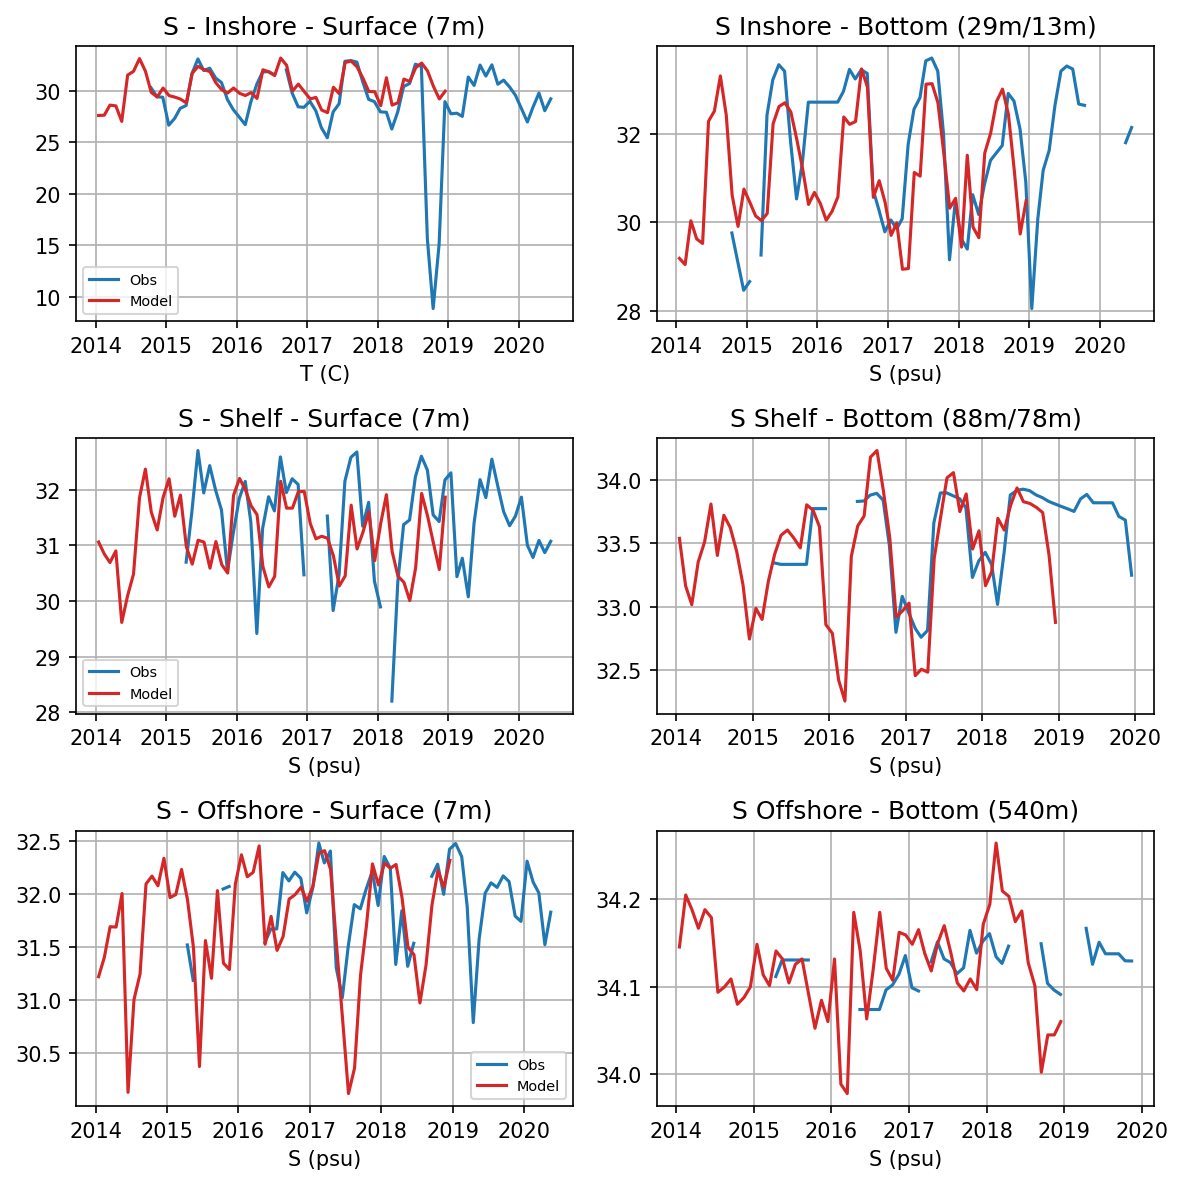

In [13]:
plt.figure(figsize=(8,8),dpi=150)

plt.subplot(3,2,1)
plt.plot(OOI_I['Fecha'],OOI_I['S_7m'],label='Obs')
plt.plot(dTI1.time,dTI1.so,label='Model',c='tab:red')
plt.grid(True)
plt.xlabel('T (C)')
plt.title('S - Inshore - Surface (7m)')
plt.legend(loc=0, fontsize='x-small')

plt.subplot(3,2,2)
plt.plot(OOI_I['Fecha'],OOI_I['S_29m'],label='Obs')
plt.plot(dTI2.time,dTI2.so,label='Model',c='tab:red')
plt.grid(True)
plt.xlabel('S (psu)')
plt.title('S Inshore - Bottom (29m/13m)')

plt.subplot(3,2,3)
plt.plot(OOI_S['Fecha'],OOI_S['S_7m'],label='Obs')
plt.plot(dTS1.time,dTS1.so,label='Model',c='tab:red')
plt.grid(True)
plt.xlabel('S (psu)')
plt.title('S - Shelf - Surface (7m)')
plt.legend(loc=0, fontsize='x-small')

plt.subplot(3,2,4)
plt.plot(OOI_S['Fecha'],OOI_S['S_88m'],label='Obs')
plt.plot(dTS2.time,dTS2.so,label='Model',c='tab:red')
plt.grid(True)
plt.xlabel('S (psu)')
plt.title('S Shelf - Bottom (88m/78m)')

plt.subplot(3,2,5)
plt.plot(OOI_O['Fecha'],OOI_O['S_7m'],label='Obs')
plt.plot(dTO1.time,dTO1.so,label='Model',c='tab:red')
plt.grid(True)
plt.xlabel('S (psu)')
plt.title('S - Offshore - Surface (7m)')
plt.legend(loc=0, fontsize='x-small')

plt.subplot(3,2,6)
plt.plot(OOI_O['Fecha'],OOI_O['S_540m'],label='Obs')
plt.plot(dTO2.time,dTO2.so,label='Model',c='tab:red')
plt.grid(True)
plt.xlabel('S (psu)')
plt.title('S Offshore - Bottom (540m)')

plt.tight_layout()
plt.savefig(figdir+'S_mod_obsOOI_interannual.png')
plt.show()

In [14]:
# Differences Salinity

#### surface ####
# Inshore
tmp = OOI_I.copy()
tmp = tmp.rename(columns={'Fecha': "Datetime"})
tmp = tmp.set_index('Datetime')

# surface
x=dTI1.so.to_dataframe()
x['year']=x.index.year.values
x['month']=x.index.month.values
x['day']=15
x['fechas'] = pd.to_datetime(x[list(x)[-3:]])
x = x.rename(columns={'fechas': "Datetime"})
x = x.set_index('Datetime')
tmp['ModTIS']=x['so']

print('S - Inshore - Surface ')
print(np.nanmean(np.abs(tmp['S_7m']-tmp['ModTIS'])))
print(np.nanstd(np.abs(tmp['S_7m']-tmp['ModTIS'])))

# Shelf
tmp = OOI_S.copy()
tmp = tmp.rename(columns={'Fecha': "Datetime"})
tmp = tmp.set_index('Datetime')

# surface
x=dTS1.so.to_dataframe()
x['year']=x.index.year.values
x['month']=x.index.month.values
x['day']=15
x['fechas'] = pd.to_datetime(x[list(x)[-3:]])
x = x.rename(columns={'fechas': "Datetime"})
x = x.set_index('Datetime')
tmp['ModTIS']=x['so']

print('\nS - Shelf - Surface ')
print(np.nanmean(np.abs(tmp['S_7m']-tmp['ModTIS'])))
print(np.nanstd(np.abs(tmp['S_7m']-tmp['ModTIS'])))

# Offshore
tmp = OOI_O.copy()
tmp = tmp.rename(columns={'Fecha': "Datetime"})
tmp = tmp.set_index('Datetime')

# surface
x=dTO1.so.to_dataframe()
x['year']=x.index.year.values
x['month']=x.index.month.values
x['day']=15
x['fechas'] = pd.to_datetime(x[list(x)[-3:]])
x = x.rename(columns={'fechas': "Datetime"})
x = x.set_index('Datetime')
tmp['ModTIS']=x['so']

print('\nS - offshore - Surface ')
print(np.nanmean(np.abs(tmp['S_7m']-tmp['ModTIS'])))
print(np.nanstd(np.abs(tmp['S_7m']-tmp['ModTIS'])))

##### Bottom ####
# Inshore
tmp = OOI_I.copy()
tmp = tmp.rename(columns={'Fecha': "Datetime"})
tmp = tmp.set_index('Datetime')

# # Bottom model=13.5, observations = 29m
x=dTI2.so.to_dataframe()
x['year']=x.index.year.values
x['month']=x.index.month.values
x['day']=15
x['fechas'] = pd.to_datetime(x[list(x)[-3:]])
x = x.rename(columns={'fechas': "Datetime"})
x = x.set_index('Datetime')
tmp['ModTIS']=x['so']

print('\n\nS - Inshore - Bottom (29m/13.5m) ')
print(np.nanmean(np.abs(tmp['S_29m']-tmp['ModTIS'])))
print(np.nanstd(np.abs(tmp['S_29m']-tmp['ModTIS'])))


# Shelf
tmp = OOI_S.copy()
tmp = tmp.rename(columns={'Fecha': "Datetime"})
tmp = tmp.set_index('Datetime')

# Bottom model=78, observations = 88m
x=dTS2.so.to_dataframe()
x['year']=x.index.year.values
x['month']=x.index.month.values
x['day']=15
x['fechas'] = pd.to_datetime(x[list(x)[-3:]])
x = x.rename(columns={'fechas': "Datetime"})
x = x.set_index('Datetime')
tmp['ModTIS']=x['so']

print('\nS - Shelf - Bottom (88m/78m) ')
print(np.nanmean(np.abs(tmp['S_88m']-tmp['ModTIS'])))
print(np.nanstd(np.abs(tmp['S_88m']-tmp['ModTIS'])))

# Offshore
tmp = OOI_O.copy()
tmp = tmp.rename(columns={'Fecha': "Datetime"})
tmp = tmp.set_index('Datetime')

# bottom 540m
x=dTO2.so.to_dataframe()
x['year']=x.index.year.values
x['month']=x.index.month.values
x['day']=15
x['fechas'] = pd.to_datetime(x[list(x)[-3:]])
x = x.rename(columns={'fechas': "Datetime"})
x = x.set_index('Datetime')
tmp['ModTIS']=x['so']

print('\nS - offshore - Bottom (540m) ')
print(np.nanmean(np.abs(tmp['S_540m']-tmp['ModTIS'])))
print(np.nanstd(np.abs(tmp['S_540m']-tmp['ModTIS'])))


S - Inshore - Surface 
1.9668839905422653
4.059065995941804

S - Shelf - Surface 
0.8675699851843246
0.6397511578934812

S - offshore - Surface 
0.31223216212599875
0.36737399216923994


S - Inshore - Bottom (29m/13.5m) 
1.1035261391904299
0.7716296808605022

S - Shelf - Bottom (88m/78m) 
0.22644684656791897
0.20488061061467908

S - offshore - Bottom (540m) 
0.04137928118116291
0.03534422387259707


In [15]:
# Dissolved Oxygen

# T
dTI = xr.open_dataset(glodir+'Stationdata_var_o2_lat_-124.272_lon_47.1336_GLORYS12V1.nc')
dTI.close()
dTI1 = dTI.sel(time=slice('2014-01-01','2020-12-31'),depth=slice(6,8)).mean('depth',skipna=True)
dTI2 = dTI.sel(time=slice('2014-01-01','2020-12-31'),depth=slice(25,38)).mean('depth',skipna=True)
dTS = xr.open_dataset(glodir+'Stationdata_var_o2_lat_-124.566_lon_46.9859_GLORYS12V1.nc')
dTS.close()
dTS1 = dTS.sel(time=slice('2014-01-01','2020-12-31'),depth=slice(6,8)).mean('depth',skipna=True)
dTS2 = dTS.sel(time=slice('2014-01-01','2020-12-31'),depth=slice(68,98)).mean('depth',skipna=True)
dTO = xr.open_dataset(glodir+'Stationdata_var_o2_lat_-124.972_lon_46.8508_GLORYS12V1.nc')
dTO.close()
dTO1 = dTO.sel(time=slice('2014-01-01','2020-12-31'),depth=slice(6,8)).mean('depth',skipna=True)
dTO2 = dTO.sel(time=slice('2014-01-01','2020-12-31'),depth=slice(510,570)).mean('depth',skipna=True)

dTI

<xarray.Dataset>
Dimensions:    (depth: 60, time: 322)
Coordinates:
    latitude   float32 ...
  * depth      (depth) float32 0.50576 1.555855 2.667682 ... 2776.039 2955.57
    longitude  float32 ...
  * time       (time) datetime64[ns] 1993-01-16T12:00:00 ... 2019-10-16T12:00:00
Data variables:
    o2         (time, depth) float32 ...

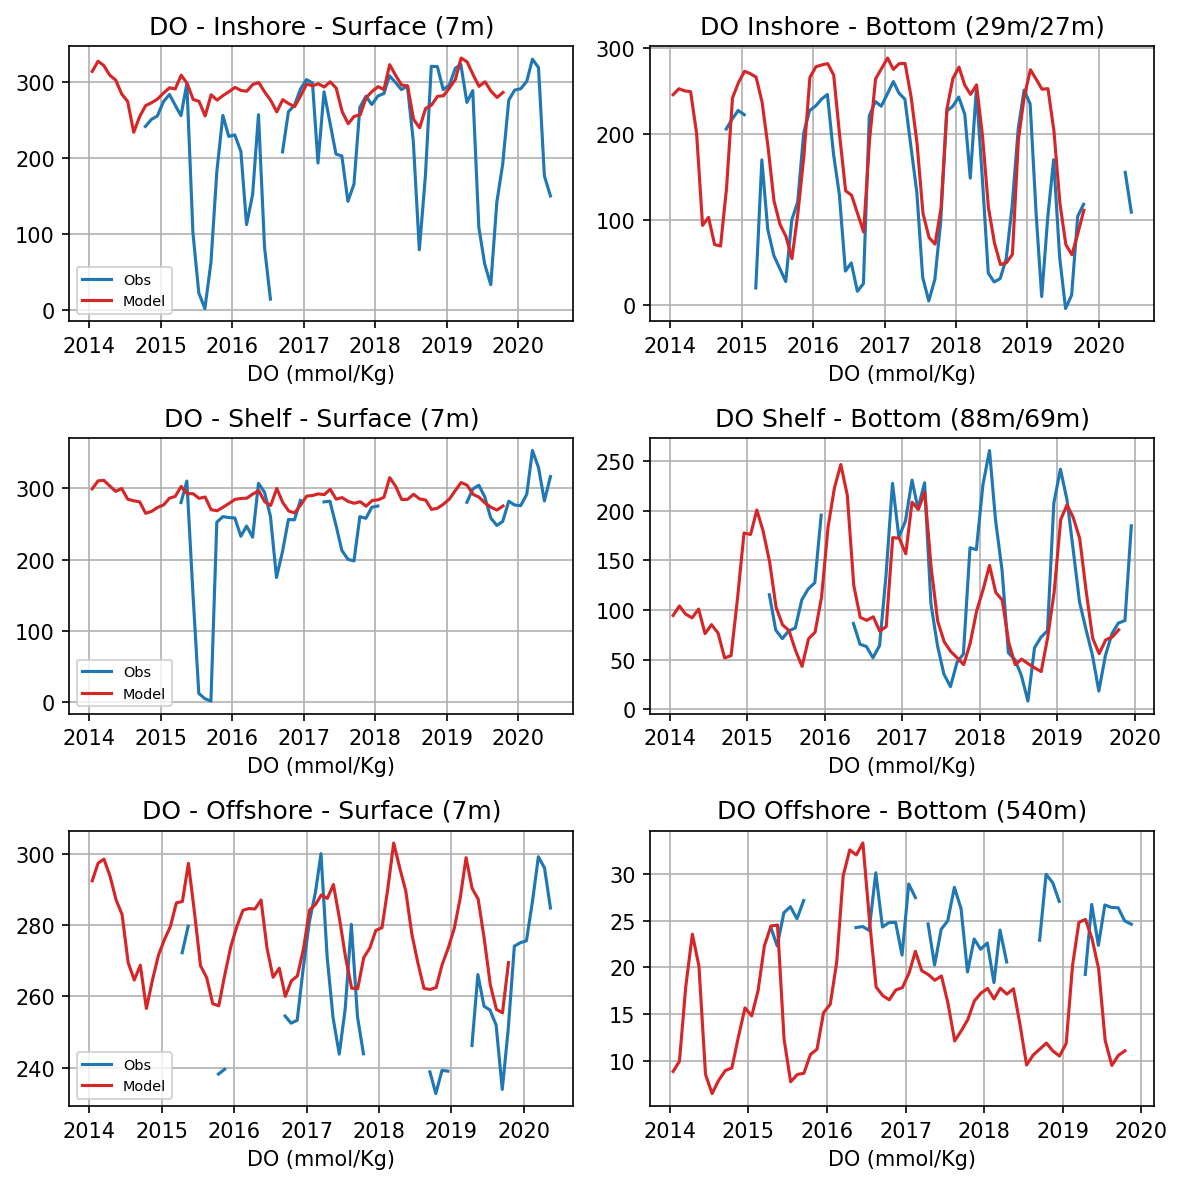

In [16]:
plt.figure(figsize=(8,8),dpi=150)

plt.subplot(3,2,1)
plt.plot(OOI_I['Fecha'],OOI_I['DO_7m'],label='Obs')
plt.plot(dTI1.time,dTI1.o2,label='Model',c='tab:red')
plt.grid(True)
plt.xlabel('DO (mmol/Kg)')
plt.title('DO - Inshore - Surface (7m)')
plt.legend(loc=0, fontsize='x-small')

plt.subplot(3,2,2)
plt.plot(OOI_I['Fecha'],OOI_I['DO_29m'],label='Obs')
plt.plot(dTI2.time,dTI2.o2,label='Model',c='tab:red')
plt.grid(True)
plt.xlabel('DO (mmol/Kg)')
plt.title('DO Inshore - Bottom (29m/27m)')

plt.subplot(3,2,3)
plt.plot(OOI_S['Fecha'],OOI_S['DO_7m'],label='Obs')
plt.plot(dTS1.time,dTS1.o2,label='Model',c='tab:red')
plt.grid(True)
plt.xlabel('DO (mmol/Kg)')
plt.title('DO - Shelf - Surface (7m)')
plt.legend(loc=0, fontsize='x-small')

plt.subplot(3,2,4)
plt.plot(OOI_S['Fecha'],OOI_S['DO_88m'],label='Obs')
plt.plot(dTS2.time,dTS2.o2,label='Model',c='tab:red')
plt.grid(True)
plt.xlabel('DO (mmol/Kg)')
plt.title('DO Shelf - Bottom (88m/69m)')

plt.subplot(3,2,5)
plt.plot(OOI_O['Fecha'],OOI_O['DO_7m'],label='Obs')
plt.plot(dTO1.time,dTO1.o2,label='Model',c='tab:red')
plt.grid(True)
plt.xlabel('DO (mmol/Kg)')
plt.title('DO - Offshore - Surface (7m)')
plt.legend(loc=0, fontsize='x-small')

plt.subplot(3,2,6)
plt.plot(OOI_O['Fecha'],OOI_O['DO_540m'],label='Obs')
plt.plot(dTO2.time,dTO2.o2,label='Model',c='tab:red')
plt.grid(True)
plt.xlabel('DO (mmol/Kg)')
plt.title('DO Offshore - Bottom (540m)')

plt.tight_layout()
plt.savefig(figdir+'DO_mod_obsOOI_interannual.png')
plt.show()

In [17]:
# Differences Dissolved Oxygen

#### surface ####
# Inshore
tmp = OOI_I.copy()
tmp = tmp.rename(columns={'Fecha': "Datetime"})
tmp = tmp.set_index('Datetime')

# surface
x=dTI1.o2.to_dataframe()
x['year']=x.index.year.values
x['month']=x.index.month.values
x['day']=15
x['fechas'] = pd.to_datetime(x[list(x)[-3:]])
x = x.rename(columns={'fechas': "Datetime"})
x = x.set_index('Datetime')
tmp['ModTIS']=x['o2']

print('DO - Inshore - Surface ')
print(np.nanmean(np.abs(tmp['DO_7m']-tmp['ModTIS'])))
print(np.nanstd(np.abs(tmp['DO_7m']-tmp['ModTIS'])))

# Shelf
tmp = OOI_S.copy()
tmp = tmp.rename(columns={'Fecha': "Datetime"})
tmp = tmp.set_index('Datetime')

# surface
x=dTS1.o2.to_dataframe()
x['year']=x.index.year.values
x['month']=x.index.month.values
x['day']=15
x['fechas'] = pd.to_datetime(x[list(x)[-3:]])
x = x.rename(columns={'fechas': "Datetime"})
x = x.set_index('Datetime')
tmp['ModTIS']=x['o2']

print('\nDO - Shelf - Surface ')
print(np.nanmean(np.abs(tmp['DO_7m']-tmp['ModTIS'])))
print(np.nanstd(np.abs(tmp['DO_7m']-tmp['ModTIS'])))

# Offshore
tmp = OOI_O.copy()
tmp = tmp.rename(columns={'Fecha': "Datetime"})
tmp = tmp.set_index('Datetime')

# surface
x=dTO1.o2.to_dataframe()
x['year']=x.index.year.values
x['month']=x.index.month.values
x['day']=15
x['fechas'] = pd.to_datetime(x[list(x)[-3:]])
x = x.rename(columns={'fechas': "Datetime"})
x = x.set_index('Datetime')
tmp['ModTIS']=x['o2']

print('\nDO - offshore - Surface ')
print(np.nanmean(np.abs(tmp['DO_7m']-tmp['ModTIS'])))
print(np.nanstd(np.abs(tmp['DO_7m']-tmp['ModTIS'])))

##### Bottom ####
# Inshore
tmp = OOI_I.copy()
tmp = tmp.rename(columns={'Fecha': "Datetime"})
tmp = tmp.set_index('Datetime')

# # Bottom model=13.5, observations = 29m
x=dTI2.o2.to_dataframe()
x['year']=x.index.year.values
x['month']=x.index.month.values
x['day']=15
x['fechas'] = pd.to_datetime(x[list(x)[-3:]])
x = x.rename(columns={'fechas': "Datetime"})
x = x.set_index('Datetime')
tmp['ModTIS']=x['o2']

print('\n\nDO - Inshore - Bottom (29m/27m) ')
print(np.nanmean(np.abs(tmp['DO_29m']-tmp['ModTIS'])))
print(np.nanstd(np.abs(tmp['DO_29m']-tmp['ModTIS'])))


# Shelf
tmp = OOI_S.copy()
tmp = tmp.rename(columns={'Fecha': "Datetime"})
tmp = tmp.set_index('Datetime')

# Bottom model=78, observations = 88m
x=dTS2.o2.to_dataframe()
x['year']=x.index.year.values
x['month']=x.index.month.values
x['day']=15
x['fechas'] = pd.to_datetime(x[list(x)[-3:]])
x = x.rename(columns={'fechas': "Datetime"})
x = x.set_index('Datetime')
tmp['ModTIS']=x['o2']

print('\nDO - Shelf - Bottom (88m/69m) ')
print(np.nanmean(np.abs(tmp['DO_88m']-tmp['ModTIS'])))
print(np.nanstd(np.abs(tmp['DO_88m']-tmp['ModTIS'])))

# Offshore
tmp = OOI_O.copy()
tmp = tmp.rename(columns={'Fecha': "Datetime"})
tmp = tmp.set_index('Datetime')

# bottom 540m - up to 773m
x=dTO2.o2.to_dataframe()
x['year']=x.index.year.values
x['month']=x.index.month.values
x['day']=15
x['fechas'] = pd.to_datetime(x[list(x)[-3:]])
x = x.rename(columns={'fechas': "Datetime"})
x = x.set_index('Datetime')
tmp['ModTIS']=x['o2']

print('\nDO - offshore - Bottom (540m, but in model it goes to 773m) ')
print(np.nanmean(np.abs(tmp['DO_540m']-tmp['ModTIS'])))
print(np.nanstd(np.abs(tmp['DO_540m']-tmp['ModTIS'])))


DO - Inshore - Surface 
71.12306591974477
78.18344752702812

DO - Shelf - Surface 
51.724730021916244
72.57794954700948

DO - offshore - Surface 
18.72692241010024
10.927734011164805


DO - Inshore - Bottom (29m/27m) 
55.63172351642582
46.830601980598054

DO - Shelf - Bottom (88m/69m) 
34.80662852361898
27.78092643346409

DO - offshore - Bottom (540m, but in model it goes to 773m) 
9.013978365702853
5.642310950708883
